In [43]:
import os
import nibabel as nib
import nilearn
import numpy as np
import pandas as pd
from nilearn import plotting, image, datasets, regions, maskers
from nilearn.connectome import ConnectivityMeasure
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #ignore warnings

In [5]:
all_data = pd.DataFrame()
for i in os.listdir('processed_data'):
    try:
        sub_data = pd.read_csv('processed_data/' + i, index_col=[0])
        all_data = pd.concat([all_data, sub_data], ignore_index=True)
    except:
        pass

In [9]:
#get mean correlation
grouped = all_data.groupby(['task', 'level_0', 'level_1'])['correlation'].mean().reset_index()

In [37]:
labels = grouped['level_0'].unique()
tasks = grouped.task.unique()
mymat = np.zeros([len(labels), len(labels), len(tasks)])
for t, task in enumerate(tasks):
    task = grouped.loc[grouped.task==task]
    for i,l0 in enumerate(labels):
        for j,l1 in enumerate(labels):
            mymat[i, j, t] = task.loc[(task.level_0==l0) & (task.level_1==l1)]['correlation'].values

In [38]:
mymat

array([[[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00],
        [ 4.58021370e-01,  4.31482350e-01,  4.42365686e-01,
          3.84218564e-01],
        [ 1.79842848e-01,  2.24388793e-01,  2.30159871e-01,
          1.91165346e-01],
        ...,
        [ 8.67899650e-02,  2.35338513e-01,  8.73658771e-02,
          1.01042539e-01],
        [ 4.92403158e-03, -7.42335486e-02, -4.57758348e-02,
         -1.11980733e-01],
        [-3.16230926e-02, -1.27913748e-01, -4.59705870e-02,
         -1.22798213e-01]],

       [[ 4.58021370e-01,  4.31482350e-01,  4.42365686e-01,
          3.84218564e-01],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00],
        [ 3.47757454e-01,  3.82775501e-01,  4.00981712e-01,
          3.45111286e-01],
        ...,
        [ 9.39389625e-02,  2.13859394e-01,  8.85773373e-02,
          1.04412594e-01],
        [-3.76318095e-02, -7.35510383e-02, -6.05103111e-04,
         -9.06900155e-02],
        [-5.893

In [69]:
#take group average
avgmat = np.mean(mymat,axis=2)

In [77]:
def plot_avg_connectivity(i, mymat=mymat, avgmat = avgmat, labels = labels):
    connectivity_matrix = mymat[:,:,i]
    np.fill_diagonal(connectivity_matrix, 0)
    linkage_matrix = hierarchy.linkage(avgmat, method='average')

    # Reorder the matrix based on the hierarchical clustering
    reordered_indices = hierarchy.leaves_list(linkage_matrix)
    reordered_matrix = connectivity_matrix[reordered_indices][:, reordered_indices]
    reordered_labels = labels[reordered_indices]

    return reordered_matrix, reordered_labels

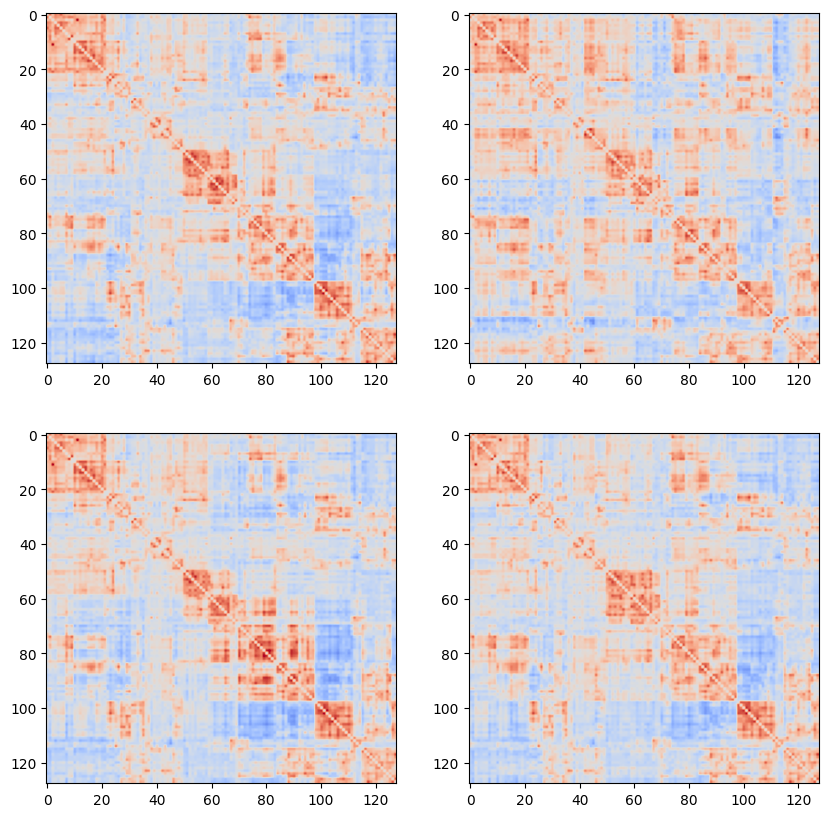

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i in range(4):
    reordered_matrix,reordered_labels = plot_avg_connectivity(i, mymat=mymat)
    # Show image
    axes[i].imshow(reordered_matrix, cmap='coolwarm', origin='upper', vmin=-0.7, vmax=0.7)
    #axes[i].set_xticklabels(reordered_labels)
#plt.colorbar()